In [1]:
import sys, os 
import numpy as np 
import pandas as pd
from src import utils, plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
default_font = 12
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange', 'grey'] #rew #nrew #rew_test #nrew_test #GI

In [3]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_15', 'blk':'4'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_16', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_01', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_04', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_05', 'blk':'3'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_15', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_10_15', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_10_16', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_23', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_15', 'blk':'3'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_11_01', 'blk':'3'})
all_sessions = VG11 + VG14 + VG15
all_sessions

[{'mname': 'VG11', 'datexp': '2024_10_15', 'blk': '4'},
 {'mname': 'VG11', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_01', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_04', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_05', 'blk': '3'},
 {'mname': 'VG11', 'datexp': '2024_11_14', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_21', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_23', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_15', 'blk': '3'},
 {'mname': 'VG15', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_11_01', 'blk': '3'}]

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object loaded from local path
dprime saved in MouseObject.train_dp (neurons) using even trials
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 

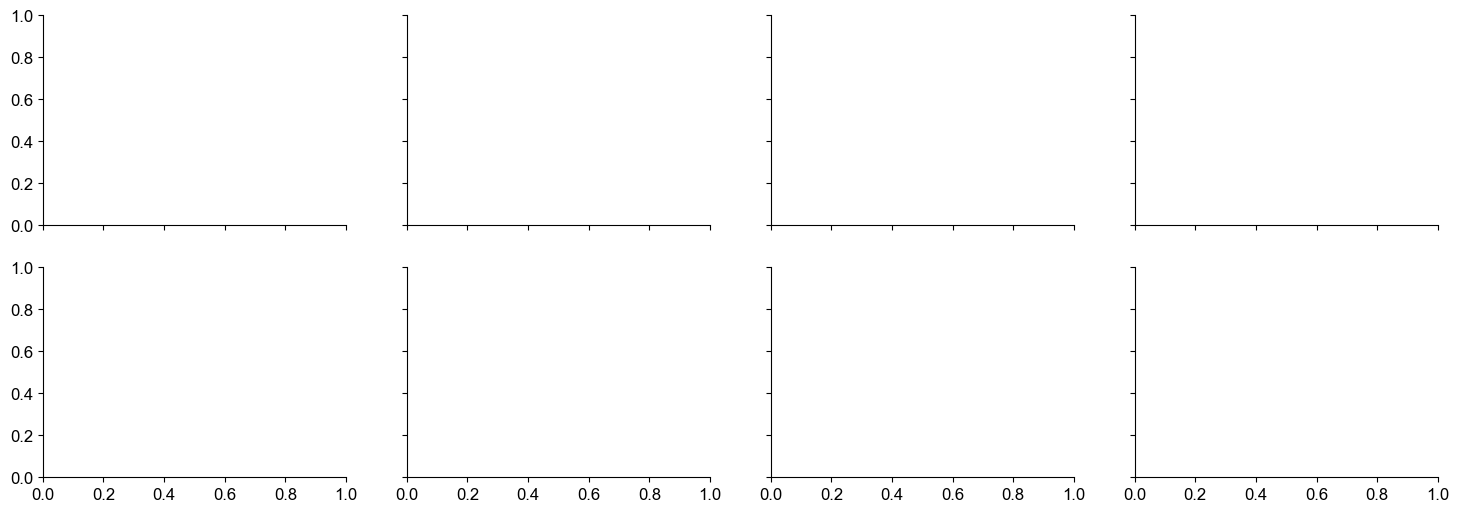

In [ ]:
from pathlib import Path
areas = ["V1", "medial", "lateral", "anterior"]
for sess in all_sessions:
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    m1.interp_spks = m1.interp_spks - m1.interp_spks.mean(1, keepdims=True)
    utils.compute_dprime(m1, discrimination_region=(25,275), concatenate=False, remove_mean=False)
    #lick_rate_df, lick_rate = utils.get_lick_rates(m1)
    ntrials = m1.interp_spks.shape[1]
    cod_dirs = np.empty((ntrials, 2, len(areas), 400))
    main_dir = Path(f"../data/notz/{name}/{date}/{blk}")
    if not main_dir.exists():
        main_dir.mkdir(parents=True)
    for indexa, area in enumerate(areas):
        ia = utils.get_region_idx(m1.iarea, area)
        for redcell in range(2):
            if redcell == 0: 
                selected_type = np.logical_not(m1.isred[:,0]).astype(bool)
            else:
                selected_type = m1.isred[:,0].astype(bool)
            pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) #tresh based on the area 
            prefer_r = (m1.train_dp>=pstv_tsh)
            prefer_nr = (m1.train_dp<=ngtv_tsh)
            area_prefer_r = prefer_r * ia * selected_type
            area_prefer_nr = prefer_nr * ia * selected_type
            dir_for_type = m1.interp_spks 
            dir_for_type = dir_for_type[area_prefer_r] - dir_for_type[area_prefer_nr]
            avg_dir = dir_for_type.mean(0)
            cod_dirs[:, redcell, indexa, :] = avg_dir
    np.save(main_dir / "cod_dirs.npy", cod_dirs)
    #np.save(main_dir / "lick_rate.npy", lick_rate)

In [17]:
for sess in range(len(all_sessions)):
    name = all_sessions[sess]['mname']
    date = all_sessions[sess]['datexp']
    blk = all_sessions[sess]['blk']
    pth = Path(fr"..\data\notz\{name}\{date}\{blk}\cod_dirs.npy")
    avg_dir = np.load(pth)
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    cd = np.empty((2, 4, 4, 400))
    for cell_type in range(2):
        for area in range(4):
            for i_t, (ttype, trials) in enumerate(m1.trial_dict.items()): 
                if ttype in ['rewarded', 'non rewarded']:    
                    trials = trials[1::2] # odd trials only
                    avg_dir_trial = avg_dir[trials]
                    avg_dir_trial = avg_dir_trial.mean(0)
                else:
                    avg_dir_trial = avg_dir[trials]
                    avg_dir_trial = avg_dir_trial.mean(0)
                cd[cell_type, area, i_t,:] = avg_dir_trial[cell_type, area, :]
    cd = np.expand_dims(cd, axis=0)
    if sess == 0:
        cod_dirs = cd
    else:
        cod_dirs = np.vstack((cod_dirs, cd))
np.save(f"../data/notz/overall/avg_cod_dirs_per_mouse_ttype.npy", cod_dirs)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object loaded from local path
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object l

In [19]:
cod_dirs.shape

(16, 2, 4, 4, 400)

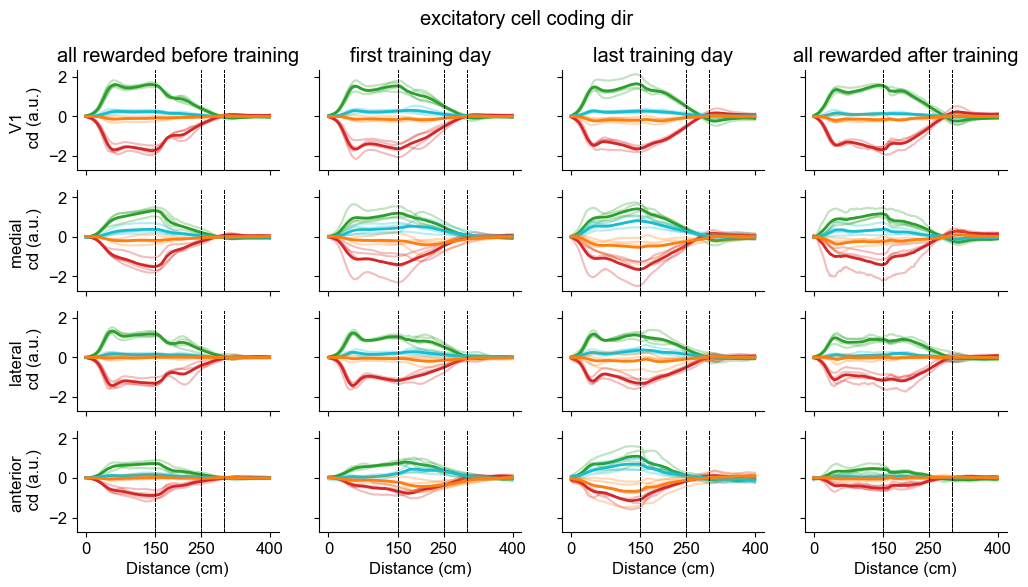

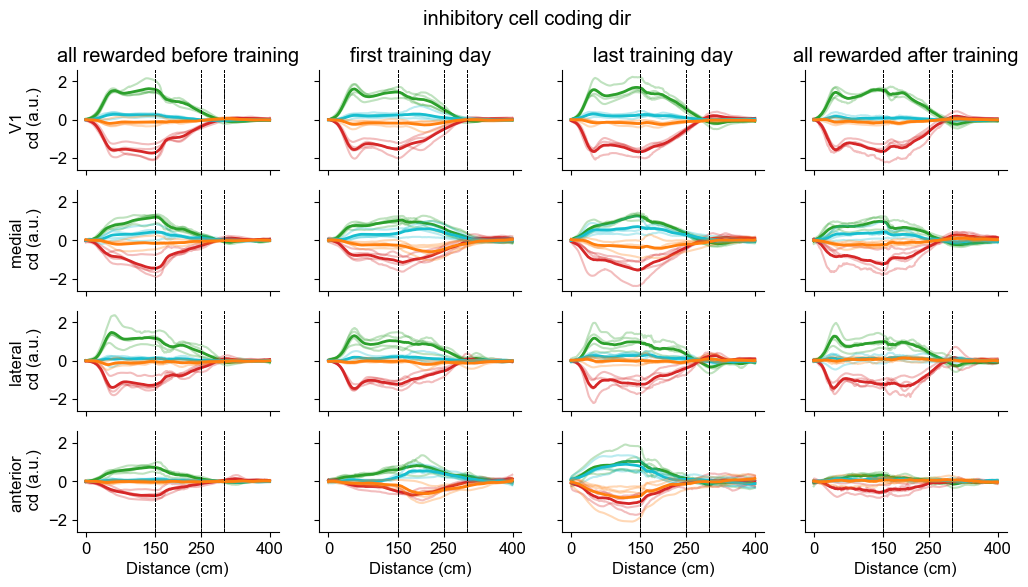

In [27]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [first_day, second_day, third_day, fourth_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(4,4, figsize=(12,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0, iss].set_title(f"{day_titles[iss]}", loc='center')
        ax[3, iss].set_xlabel('Distance (cm)')
        ax[3, iss].set_xticks([0, 150, 250, 400])
        day_cds = cod_dirs[sess]
        avg_day = day_cds.mean(0)
        for area in range(4):
            ax[area, 0].set_ylabel(f'{areas[area]} \n cd (a.u.)')
            for trial_type in range(4):
                ax[area, iss].plot(np.arange(0,400), avg_day[cell_type, area, trial_type, :], color=trial_type_palette[trial_type], linewidth=2)
                for days in range(4):
                    ax[area, iss].plot(np.arange(0,400), day_cds[days, cell_type, area, trial_type, :], alpha=0.3, color=trial_type_palette[trial_type])   
                    ax[area, iss].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    ax[area, iss].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    ax[area, iss].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    if cell_type == 0:
                        tp = 'Pyr'
                    else:
                        tp = 'Int'
    fig.savefig(f"../data/notz/overall/cod_dirs_{tp}.png", bbox_inches='tight')
                    

In [28]:
df_quantification = pd.DataFrame(columns=['mouse', 'date', 'blk','day', 'area', 'category',
                                          'celltype','max_response', 'max_pos', 'avg_on_contrast', 
                                          'avg_first_half', 'avg_second_half', 'avg_gray',
                                          'slope_first_half', 'slope_second_half', 'biggest_change_pos', 'no_peaks_half_max'])
from scipy.signal import find_peaks
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [first_day, second_day, third_day, fourth_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type, cell_name in enumerate(['Pyr', 'Int']):
    for iss, sess in enumerate(sess_days):
        day_cds = cod_dirs[sess]
        for area, area_name in enumerate(areas):
            for trial_type, category in enumerate(['A','B']):
                trial_type = trial_type + 2
                for days in range(4):
                    day_cd = day_cds[days, cell_type, area, trial_type, :]
                    day_cd = np.abs(day_cd)
                    max_response = day_cd.max()
                    max_pos = day_cd.argmax()
                    avg_on_contrast = day_cd[25:275].mean()
                    avg_first_half = day_cd[25:150].mean()
                    avg_second_half = day_cd[150:275].mean()
                    avg_gray = day_cd[275:].mean()
                    slope_first_half = np.polyfit(np.arange(25,150), day_cd[25:150], 1)[0]
                    slope_second_half = np.polyfit(np.arange(150,275), day_cd[150:275], 1)[0]
                    biggest_change_pos = np.argmax(np.abs(np.diff(day_cd)))
                    no_peaks_half_max = len(find_peaks(day_cd[25:275],height=max_response*.5)[0])
                    df_quantification = df_quantification.append({'mouse': all_sessions[days]['mname'], 
                                                                  'date': all_sessions[days]['datexp'], 
                                                                  'blk': all_sessions[days]['blk'],
                                                                  'day': days, 
                                                                  'area': area_name, 
                                                                  'category': category, 
                                                                  'celltype': cell_name,
                                                                  'max_response': max_response, 
                                                                  'max_pos': max_pos, 
                                                                  'avg_on_contrast': avg_on_contrast, 
                                                                  'avg_first_half': avg_first_half, 
                                                                  'avg_second_half': avg_second_half, 
                                                                  'avg_gray': avg_gray,
                                                                  'slope_first_half': slope_first_half, 
                                                                  'slope_second_half': slope_second_half, 
                                                                  'biggest_change_pos': biggest_change_pos, 
                                                                  'no_peaks_half_max': no_peaks_half_max}, ignore_index=True)
df_quantification.to_csv("../data/notz/overall/df_quantification_on_cds.csv", index=False)

C:\Users\labadmin\AppData\Local\Temp\ipykernel_34400\1331456586.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_quantification = df_quantification.append({'mouse': all_sessions[days]['mname'],
C:\Users\labadmin\AppData\Local\Temp\ipykernel_34400\1331456586.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_quantification = df_quantification.append({'mouse': all_sessions[days]['mname'],
C:\Users\labadmin\AppData\Local\Temp\ipykernel_34400\1331456586.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_quantification = df_quantification.append({'mouse': all_sessions[days]['mname'],
C:\Users\labadmin\AppData\Local\Temp\ipykernel_34400\1331456586.py:32: FutureWarning: The frame.append method is deprecated and wi

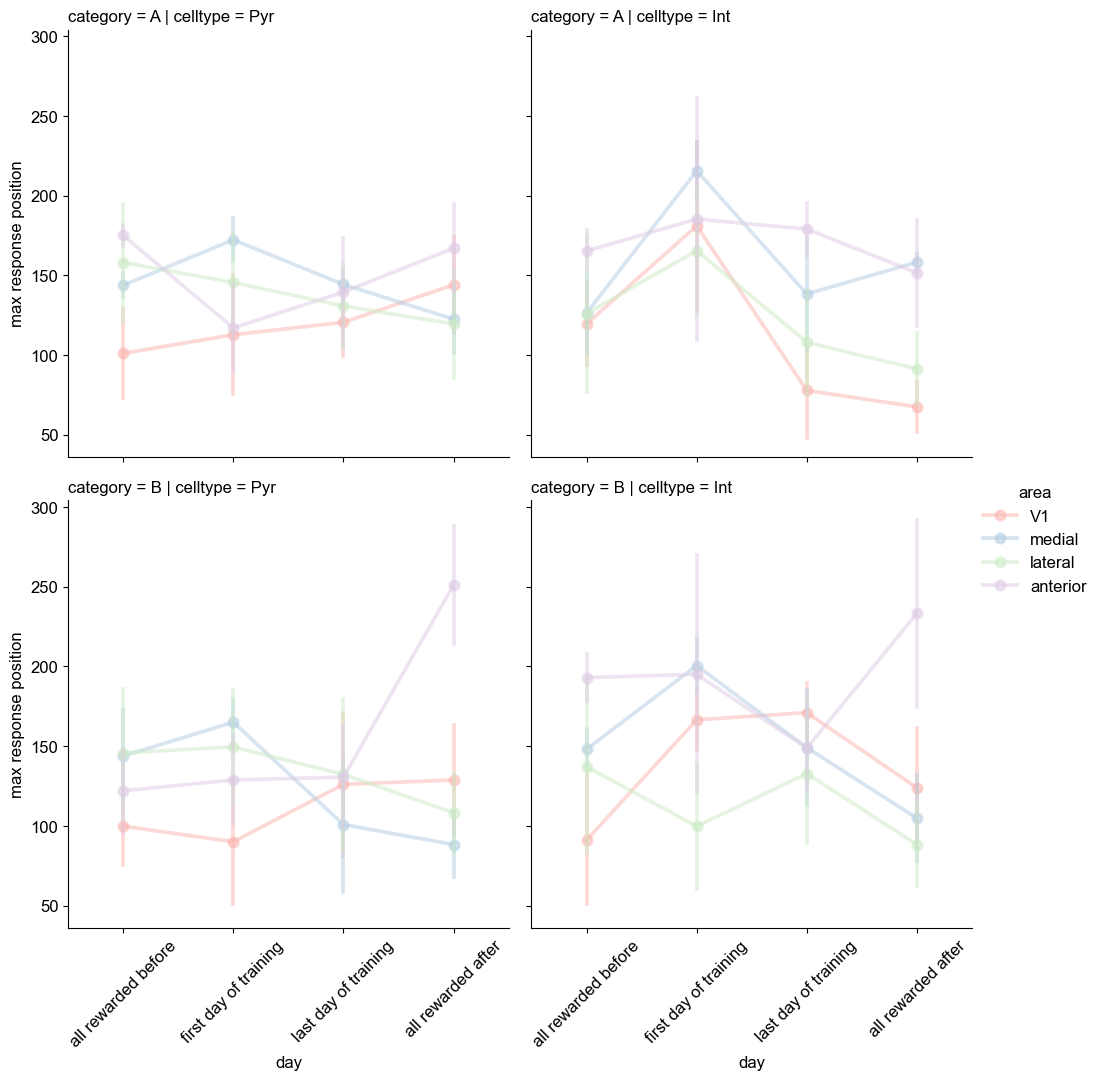

In [34]:
g = sns.catplot(data=df_quantification, x='day', y='max_pos', hue='area', col='celltype', row='category', kind='point', errorbar='se', palette='Pastel1', hue_order=['V1', 'medial', 'lateral', 'anterior'], alpha=0.5)
g.set_ylabels(f'max response position')
g.set_xticklabels(['all rewarded before', 'first day of training', 'last day of training', 'all rewarded after'], rotation=45)

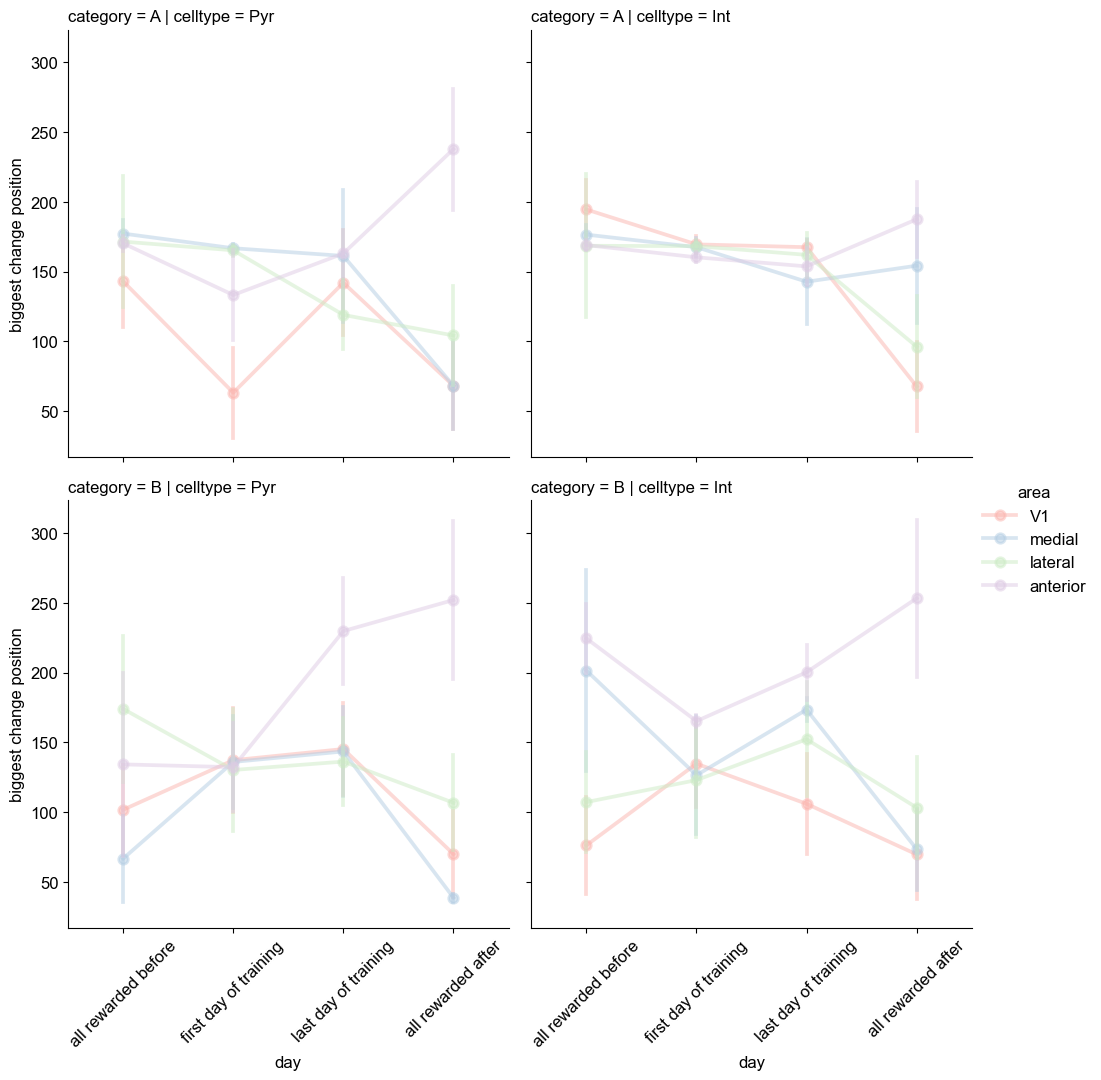

In [35]:
g = sns.catplot(data=df_quantification, x='day', y='biggest_change_pos', hue='area', col='celltype', row='category', kind='point', errorbar='se', palette='Pastel1', hue_order=['V1', 'medial', 'lateral', 'anterior'], alpha=0.5)
g.set_ylabels(f'biggest change position')
g.set_xticklabels(['all rewarded before', 'first day of training', 'last day of training', 'all rewarded after'], rotation=45)

In [65]:
lick_rates = np.empty((16,2,2), dtype=object)
lick_response = np.empty((16, 2, 4, 2, 2), dtype=object)
for sess in range(len(all_sessions)):
    name = all_sessions[sess]['mname']
    date = all_sessions[sess]['datexp']
    blk = all_sessions[sess]['blk']
    pth = Path(fr"..\data\notz\{name}\{date}\{blk}\cod_dirs.npy")
    avg_dir = np.load(pth)
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    trials_licks = {}
    trials_nolicks = {}
    for k in m1.trial_dict.keys():
        t_licks, t_no_licks = utils.get_trials_with_licks(m1, lick_window=(150,250), trialtype=k)
        trials_licks[k] = t_licks
        trials_nolicks[k] = t_no_licks
    rtrials_nolick  = trials_nolicks['rewarded test']
    rtrials_wlick  = trials_licks['rewarded test']
    nrtrials_nolick  = trials_nolicks['non rewarded test']
    nrtrials_wlick  = trials_licks['non rewarded test']
    lick_rate = np.load(Path(f"../data/notz/{name}/{date}/{blk}/lick_rate.npy"))
    lick_rates[sess,0,0] = lick_rate[rtrials_wlick]
    lick_rates[sess,0,1] = lick_rate[rtrials_nolick]
    lick_rates[sess,1,0] = lick_rate[nrtrials_wlick]
    lick_rates[sess,1,1] = lick_rate[nrtrials_nolick]
    for cell_type in range(2):
        for area in range(4):  
            avg_dir_trial_r_wlick = avg_dir[rtrials_wlick]
            avg_dir_trial_r_wolick = avg_dir[rtrials_nolick]
            avg_dir_trial_nr_wlick = avg_dir[nrtrials_wlick]
            avg_dir_trial_nr_wolick = avg_dir[nrtrials_nolick]
            lick_response[sess,cell_type, area, 0,0] = avg_dir_trial_r_wlick[:, cell_type, area, :]
            lick_response[sess,cell_type, area, 0,1] = avg_dir_trial_r_wolick[:, cell_type, area, :]
            lick_response[sess,cell_type, area, 1,0] = avg_dir_trial_nr_wlick[:, cell_type, area, :]
            lick_response[sess,cell_type, area, 1,1] = avg_dir_trial_nr_wolick[:, cell_type, area, :]
np.save(f"../data/notz/overall/licks_rates_splitted_with_wo_licksonrew.npy", lick_rates)
np.save(f"../data/notz/overall/lick_response_splitted_with_wo_licksonrew.npy", lick_response)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object loaded from local path
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object l

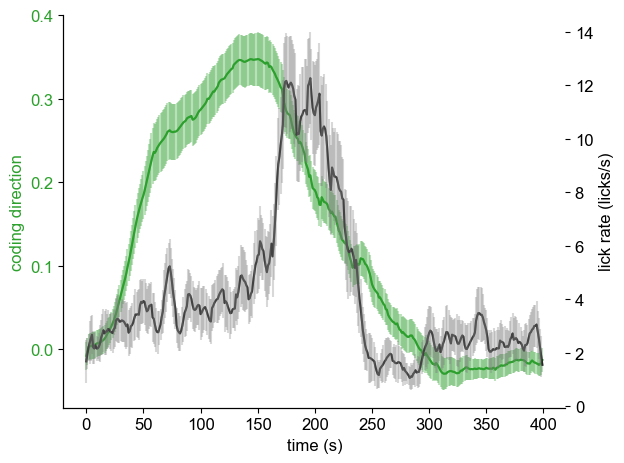

In [100]:
from scipy.stats import sem
#dual axis plot
fig, ax1 = plt.subplots()
ax1.set_xlabel('time (s)')
ax1.set_ylabel('coding direction', color='tab:green')
ax1.plot(lick_response[0,0,1,0,0].mean(0), color='tab:green', label='rew_test_licks')
ax1.errorbar(np.arange(400), lick_response[0,0,1,0,0].mean(0), yerr=sem(lick_response[0,0,1,0,0]), color='tab:green', alpha = 0.3)
ax1.tick_params(axis='y', labelcolor='tab:green')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
smoothing = 10
lick_rate_s = np.convolve(lick_rates[0,0,0].mean(0), np.ones(smoothing)/smoothing, mode='same')
ax2.plot(lick_rate_s, color='k', label='lick rate')
ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(lick_rates[0,0,0]), alpha = 0.3, color='gray')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

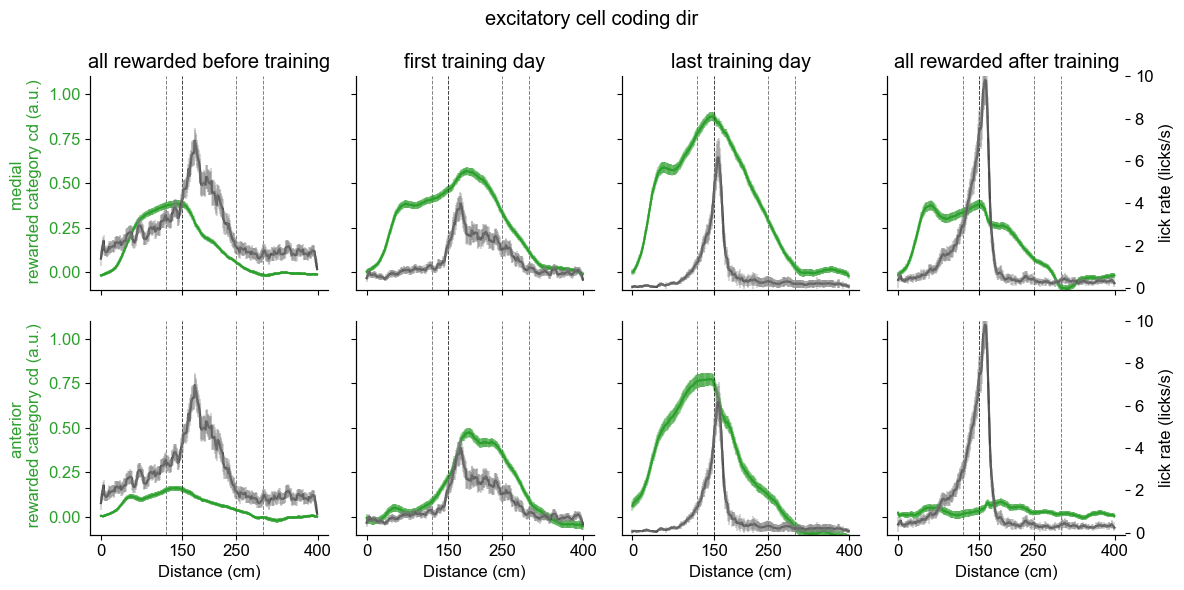

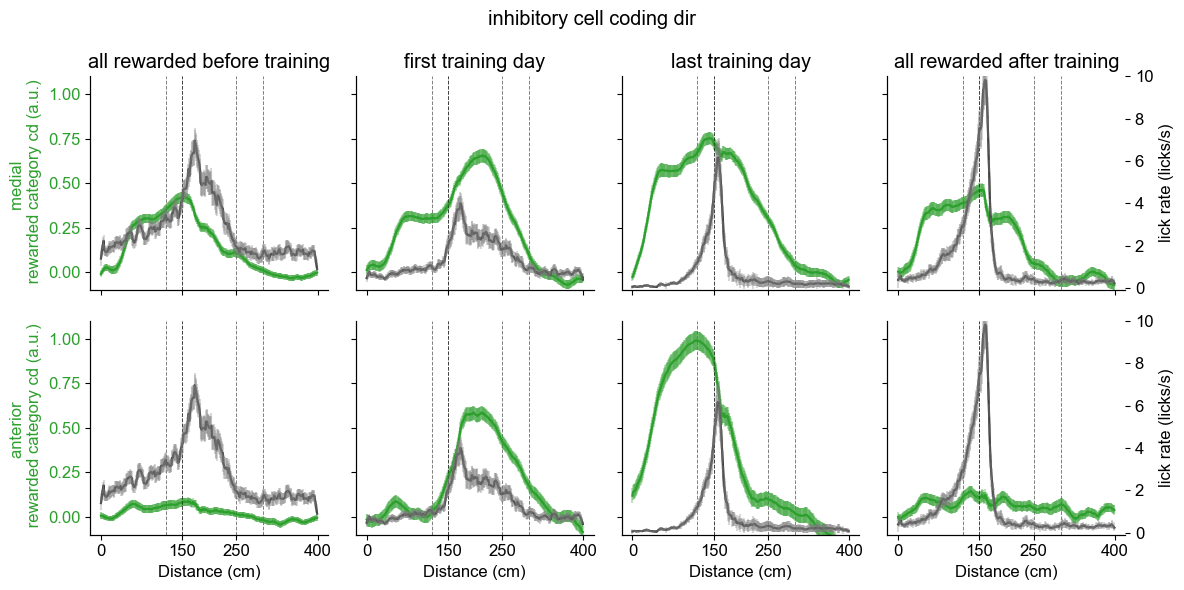

In [228]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [first_day, second_day, third_day, fourth_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,4, figsize=(12,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0, iss].set_title(f"{day_titles[iss]}", loc='center')
        ax[1, iss].set_xlabel('Distance (cm)')
        ax[1, iss].set_xticks([0, 150, 250, 400])
        day_rates = lick_rates[sess,0,0]
        day_rates = np.vstack(day_rates)
        for a, area in enumerate([1,3]):
            day_cds = lick_response[sess,cell_type,area,0,0]
            day_cds = np.vstack(day_cds)
            ax[a, 0].set_ylabel(f'{areas[area]} \n rewarded category cd (a.u.)', color='tab:green')
            ax[a, iss].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=120, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].plot(day_cds.mean(0), color='tab:green', label='rew_test_licks')
            ax[a, iss].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', alpha = 0.3)
            ax[a, iss].tick_params(axis='y', labelcolor='tab:green')
            ax[a, iss].set_ylim((-0.1, 1.1))
            # draw a vertical line at 150
            ax[a, iss].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax2 = ax[a, iss].twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylim((-.1, 10))
            if iss == 3:
                ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
            else:
                ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
            
            smoothing = 10
            lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
            ax2.plot(lick_rate_s, color='k', label='lick rate')
            ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

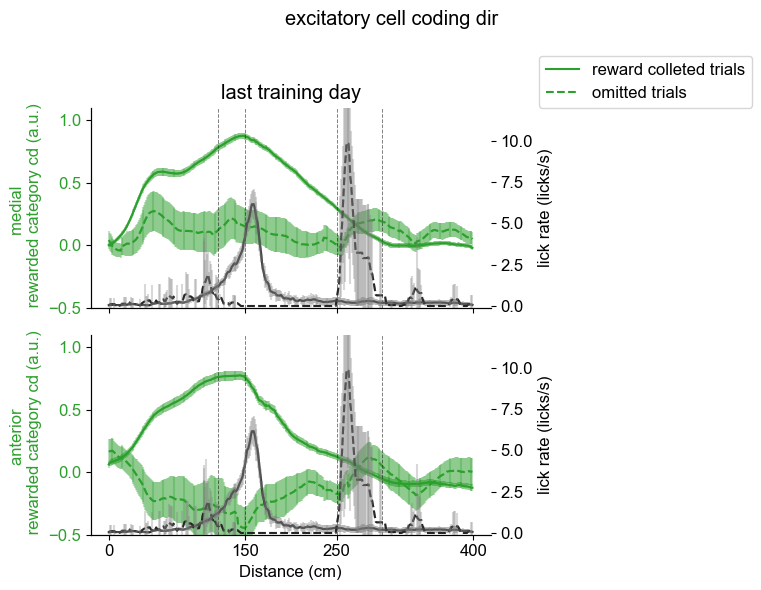

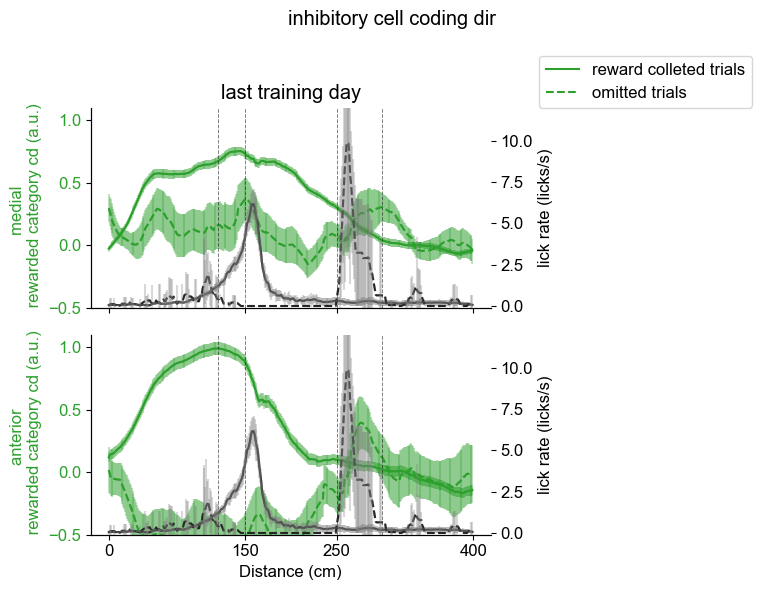

In [226]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,1, figsize=(8,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center')
        ax[1].set_xlabel('Distance (cm)')
        ax[1].set_xticks([0, 150, 250, 400])
        for a, area in enumerate([1,3]):
            for lick in range(2):
                day_cds = lick_response[sess,cell_type,area,0,lick]
                day_rates = lick_rates[sess,0,lick]
                day_rates = np.vstack(day_rates)
                day_cds = np.vstack(day_cds)
                if lick == 0:
                    ax[a].plot(day_cds.mean(0), color='tab:green', label='reward colleted trials')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', alpha = 0.3)
                    ax2 = ax[a].twinx()  # instantiate a second axes that shares the same x-axis
                    ax2.set_ylim((-.1, 10))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='lick rate')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
                else:
                    ax[a].plot(day_cds.mean(0), color='tab:green', label='omitted trials', linestyle='--')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', linestyle='--', alpha = 0.3)
                    ax2.set_ylim((-.1, 12))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='omitted trials', linestyle='--')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray', linestyle='--')
            ax[a].tick_params(axis='y', labelcolor='tab:green')
            ax[a].set_ylim((-0.5, 1.1))
            ax[a].set_ylabel(f'{areas[area]} \n rewarded category cd (a.u.)', color='tab:green')
            ax[a].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=120, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            # draw a vertical line at 150
            ax[0].legend(bbox_to_anchor=(1.10, 1.3), loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

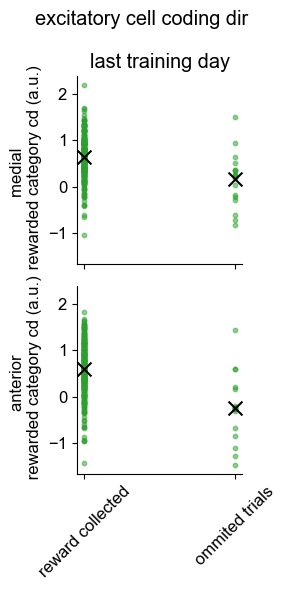

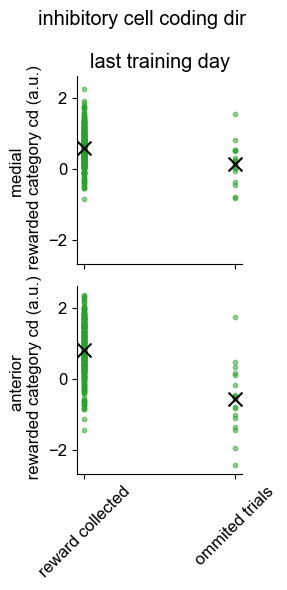

In [172]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,1, figsize=(3,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center')
        for a, area in enumerate([1,3]):
            for lick in range(2):
                day_cds = lick_response[sess,cell_type,area,0,lick]
                day_cds = np.vstack(day_cds)
                day_cds = day_cds[:,25:150].mean(1)
                if lick == 0:
                    ax[a].scatter(np.zeros_like(day_cds),day_cds, color='tab:green',  alpha=0.5, s=10)
                    #plot mean 
                    ax[a].scatter(0, day_cds.mean(), color='k', marker='x', s=100)
                    ax[a].set_ylabel(f'{areas[area]} \n rewarded category cd (a.u.)')
                else:
                    ax[a].scatter(np.ones_like(day_cds)*.1,day_cds, color='tab:green',  alpha=0.5, s=10)
                    ax[a].scatter(.1, day_cds.mean(), color='k', marker='x', s=100)   
                    ax[a].set_ylabel(f'{areas[area]} \n rewarded category cd (a.u.)')
                    ax[a].set_xticks([0, .1], ['reward collected', 'ommited trials'], rotation=45)      
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

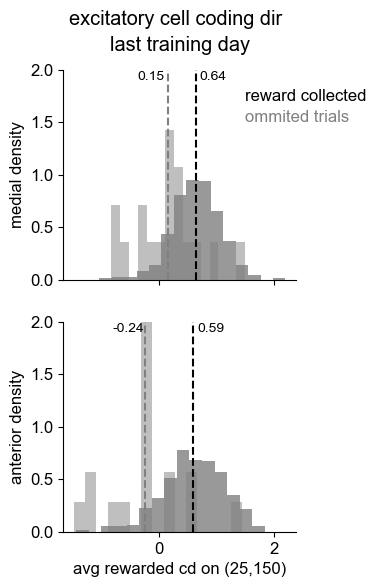

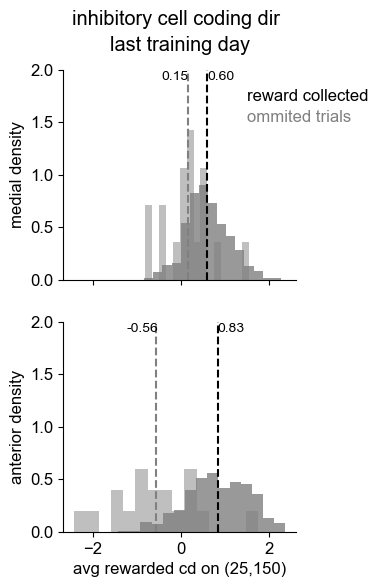

In [221]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,1, figsize=(3,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center', y=1.05)
        ax[0].text(1.5, 1.7, 'reward collected', color='k')
        ax[0].text(1.5, 1.5, 'ommited trials', color='gray')
        ax[1].set_xlabel(f'avg rewarded cd on (25,150)')
        for a, area in enumerate([1,3]):
            ax[a].set_ylabel(f'{areas[area]} density')
            ax[a].set_ylim(0,2)
            for lick in range(2):
                day_cds = lick_response[sess,cell_type,area,0,lick]
                day_cds = np.vstack(day_cds)
                day_cds = day_cds[:,25:150].mean(1)
                if lick == 0:
                    ax[a].hist(day_cds, color='k',  alpha=0.4, bins=15, density=True)
                    #plot mean 
                    ax[a].axvline(day_cds.mean(), c='k', linestyle='--')
                    # add text for the mean
                    ax[a].text(day_cds.mean()+.3, 1.9, f'{day_cds.mean():.2f}', fontsize=10, ha='center')
                else:
                    ax[a].hist(day_cds, color='gray', alpha=0.5, bins=15, density=True)
                    #plot mean 
                    ax[a].axvline(day_cds.mean(), c='gray', linestyle='--')
                    # add text for the mean
                    ax[a].text(day_cds.mean()-.3, 1.9, f'{day_cds.mean():.2f}', fontsize=10, ha='center')


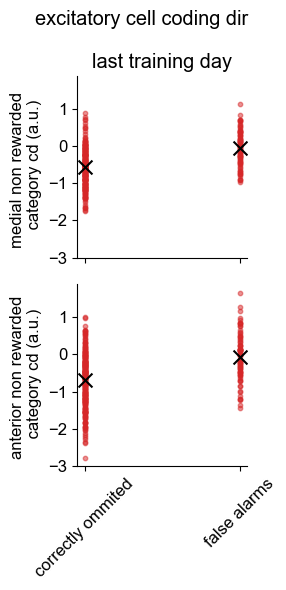

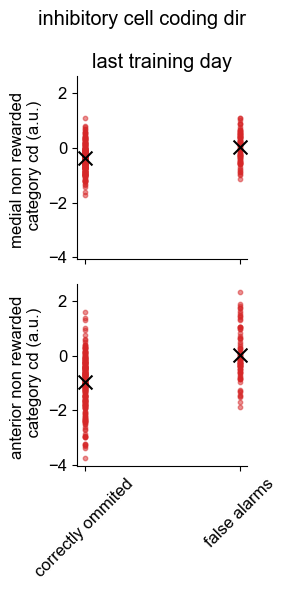

In [175]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,1, figsize=(3,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center')
        for a, area in enumerate([1,3]):
            for lick in range(2):
                day_cds = lick_response[sess,cell_type,area,1,lick]
                day_cds = np.vstack(day_cds)
                day_cds = day_cds[:,25:150].mean(1)
                if lick == 0:
                    ax[a].scatter(np.ones_like(day_cds)*.1,day_cds, color='tab:red', alpha=0.5, s=10)
                    #plot mean 
                    ax[a].scatter(.1, day_cds.mean(), color='k', marker='x', s=100)
                    ax[a].set_ylabel(f'{areas[area]} non rewarded \n category cd (a.u.)')
                else:
                    ax[a].scatter(np.zeros_like(day_cds),day_cds, color='tab:red', alpha=0.5, s=10)
                    ax[a].scatter(0, day_cds.mean(), color='k', marker='x', s=100)   
                    ax[a].set_ylabel(f'{areas[area]} non rewarded \n category cd (a.u.)')
                    ax[a].set_xticks([0, .1], ['correctly ommited', 'false alarms'], rotation=45)      
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

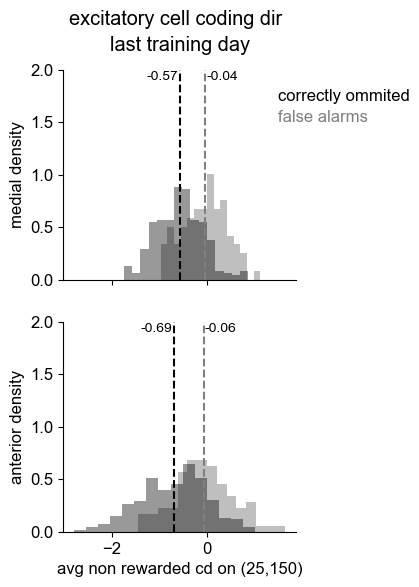

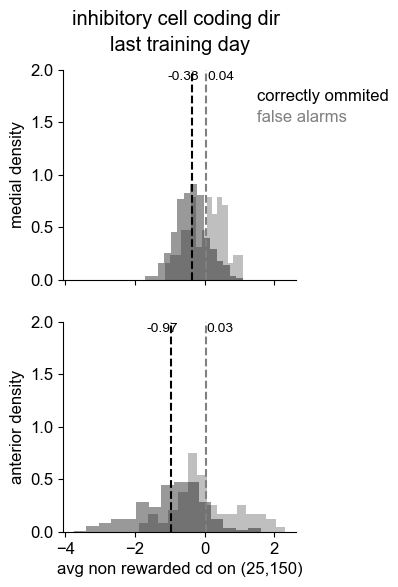

In [217]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(2,1, figsize=(3,6), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center', y=1.05)
        ax[0].text(1.5, 1.7, 'correctly ommited', color='k')
        ax[0].text(1.5, 1.5, 'false alarms', color='gray')
        ax[1].set_xlabel(f'avg non rewarded cd on (25,150)')
        for a, area in enumerate([1,3]):
            ax[a].set_ylabel(f'{areas[area]} density')
            ax[a].set_ylim(0,2)
            for lick in range(2):
                day_cds = lick_response[sess,cell_type,area,1,lick]
                day_cds = np.vstack(day_cds)
                day_cds = day_cds[:,25:150].mean(1)
                if lick == 1:
                    ax[a].hist(day_cds, color='k',  alpha=0.4, bins=15, density=True)
                    #plot mean 
                    ax[a].axvline(day_cds.mean(), c='k', linestyle='--')
                    # add text for the mean
                    ax[a].text(day_cds.mean()-.7, 1.9, f'{day_cds.mean():.2f}', fontsize=10)
                else:
                    ax[a].hist(day_cds, color='gray', alpha=0.5, bins=15, density=True)
                    #plot mean 
                    ax[a].axvline(day_cds.mean(), c='gray', linestyle='--')
                    # add text for the mean
                    ax[a].text(day_cds.mean()+.03, 1.9, f'{day_cds.mean():.2f}', fontsize=10)

# based on the previous, I will prioritize selecting neurons on the 0 to 120 portion of the corridor

In [230]:
from pathlib import Path
areas = ["V1", "medial", "lateral", "anterior"]
for sess in all_sessions:
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    m1.interp_spks = m1.interp_spks - m1.interp_spks.mean(1, keepdims=True)
    utils.compute_dprime(m1, discrimination_region=(0,125), concatenate=False, remove_mean=False)
    #lick_rate_df, lick_rate = utils.get_lick_rates(m1)
    ntrials = m1.interp_spks.shape[1]
    ncells = m1.interp_spks.shape[0]
    cod_dirs = np.empty((ntrials, 2, len(areas), 400))
    proportion = np.empty((len(areas), 2, 2))
    selective_cells = np.empty((4,2,2, ncells))
    main_dir = Path(f"../data/notz/{name}/{date}/{blk}")
    if not main_dir.exists():
        main_dir.mkdir(parents=True)
    for indexa, area in enumerate(areas):
        ia = utils.get_region_idx(m1.iarea, area)
        for redcell in range(2):
            if redcell == 0: 
                selected_type = np.logical_not(m1.isred[:,0]).astype(bool)
            else:
                selected_type = m1.isred[:,0].astype(bool)
            pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) #tresh based on the area 
            prefer_r = (m1.train_dp>=pstv_tsh)
            prefer_nr = (m1.train_dp<=ngtv_tsh)
            area_prefer_r = prefer_r * ia * selected_type
            area_prefer_nr = prefer_nr * ia * selected_type
            dir_for_type = m1.interp_spks 
            dir_for_type = dir_for_type[area_prefer_r] - dir_for_type[area_prefer_nr]
            avg_dir = dir_for_type.mean(0)
            cod_dirs[:, redcell, indexa, :] = avg_dir
            selective_cells[indexa, redcell, 0, :] = area_prefer_r
            selective_cells[indexa, redcell, 1, :] = area_prefer_nr
            # proportion of cells changing 
            prefer_r_1 = (m1.train_dp>=1)
            prefer_nr_1 = (m1.train_dp<=-1)
            area_prefer_r_1 = prefer_r_1 * ia * selected_type
            area_prefer_nr_1 = prefer_nr_1 * ia * selected_type
            proportion[indexa,redcell,0] = (area_prefer_r_1.sum()) / (ia * selected_type).sum()
            proportion[indexa,redcell,1] = (area_prefer_nr_1.sum()) / (ia * selected_type).sum()
    np.save(main_dir / "cod_dirs_0_125.npy", cod_dirs)
    np.save(main_dir / "selective_cells_0_125.npy", selective_cells)
    np.save(main_dir / "proportion_cells_0_125_1tsh.npy", proportion)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
*************************************
Mouse object loaded from local path
dprime saved in MouseObject.train_dp (neurons) using even trials
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 

In [252]:
lick_response = np.empty((16, 4, 4, 2, 2), dtype=object)
for sess in range(len(all_sessions)):
    name = all_sessions[sess]['mname']
    date = all_sessions[sess]['datexp']
    blk = all_sessions[sess]['blk']
    pth = Path(fr"..\data\notz\{name}\{date}\{blk}\cod_dirs_0_125.npy")
    cod_dirs = np.load(pth)
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    for i_t, (ttype, trials) in enumerate(m1.trial_dict.items()):
        t_licks, t_no_licks = utils.get_trials_with_licks(m1, lick_window=(150,250), trialtype=ttype, onlytest=True)
        cod_dir_licks = cod_dirs[t_licks]
        cod_dir_no_licks = cod_dirs[t_no_licks] 
        for area in range(4): 
            for cell_type in range(2):
                print(f"processing {ttype}{area}{cell_type}")
                lick_response[sess,i_t,area,cell_type,0] = cod_dir_licks[:, cell_type, area, :]
                lick_response[sess,i_t,area,cell_type,1] = cod_dir_no_licks[:, cell_type, area, :]
np.save(f"../data/notz/overall/cod_dir_splitted_with_wo_licks_pertrial_0_125.npy", lick_response)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
processing rewarded00
processing rewarded01
processing rewarded10
processing rewarded11
processing rewarded20
processing rewarded21
processing rewarded30
processing rewarded31
processing non rewarded00
processing non rewarded01
processing non rewarded10
processing non rewarded11
processing non rewarded20
processing non rewarded21
processing non rewarded30
processing non rewarded31
processing rewarded test00
processing rewarded test01
processing rewarded test10
processing rewarded test11
processing rewarded test20
processing rewarded test21
processing reward

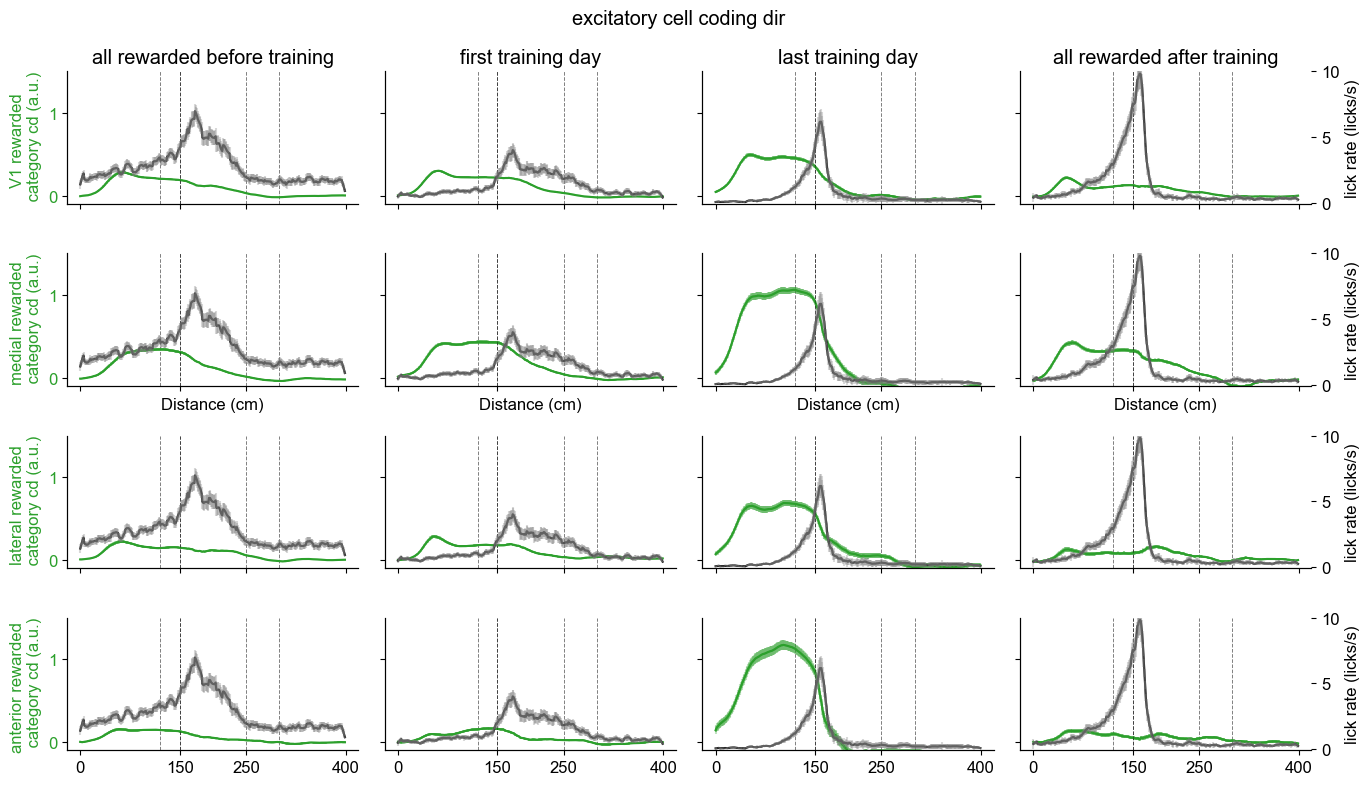

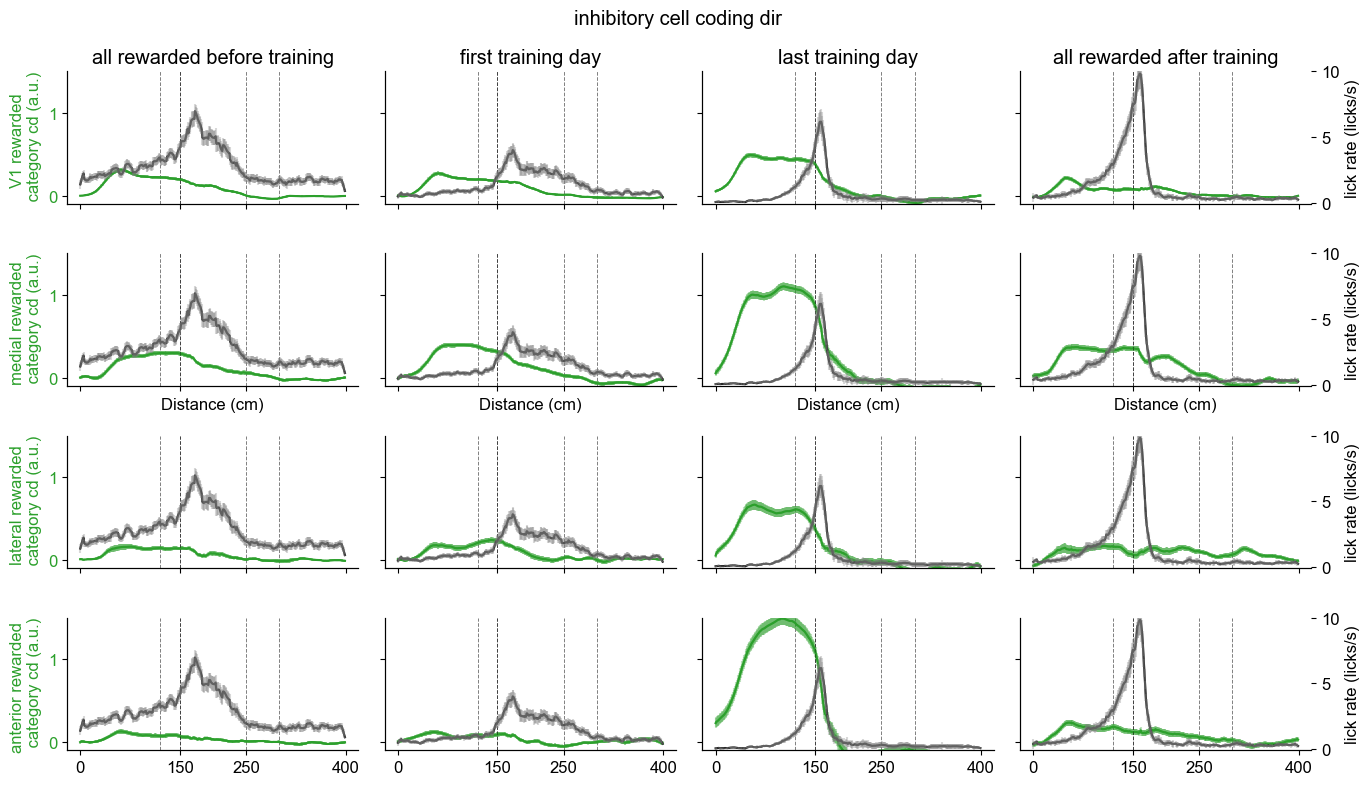

In [255]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [first_day, second_day, third_day, fourth_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(4,4, figsize=(14,8), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0, iss].set_title(f"{day_titles[iss]}", loc='center')
        ax[1, iss].set_xlabel('Distance (cm)')
        ax[1, iss].set_xticks([0, 150, 250, 400])
        day_rates = lick_rates[sess,0,0]
        day_rates = np.vstack(day_rates)
        for a, area in enumerate(areas):
            day_cds = lick_response[sess,2,a,cell_type,0]
            day_cds = np.vstack(day_cds)
            ax[a, 0].set_ylabel(f'{area} rewarded \n category cd (a.u.)', color='tab:green')
            ax[a, iss].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=120, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a, iss].plot(day_cds.mean(0), color='tab:green', label='rew_test_licks')
            ax[a, iss].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', alpha = 0.3)
            ax[a, iss].tick_params(axis='y', labelcolor='tab:green')
            ax[a, iss].set_ylim((-0.1, 1.5))
            # draw a vertical line at 150
            ax[a, iss].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax2 = ax[a, iss].twinx()  # instantiate a second axes that shares the same x-axis
            ax2.set_ylim((-.1, 10))
            if iss == 3:
                ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
            else:
                ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
            
            smoothing = 10
            lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
            ax2.plot(lick_rate_s, color='k', label='lick rate')
            ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

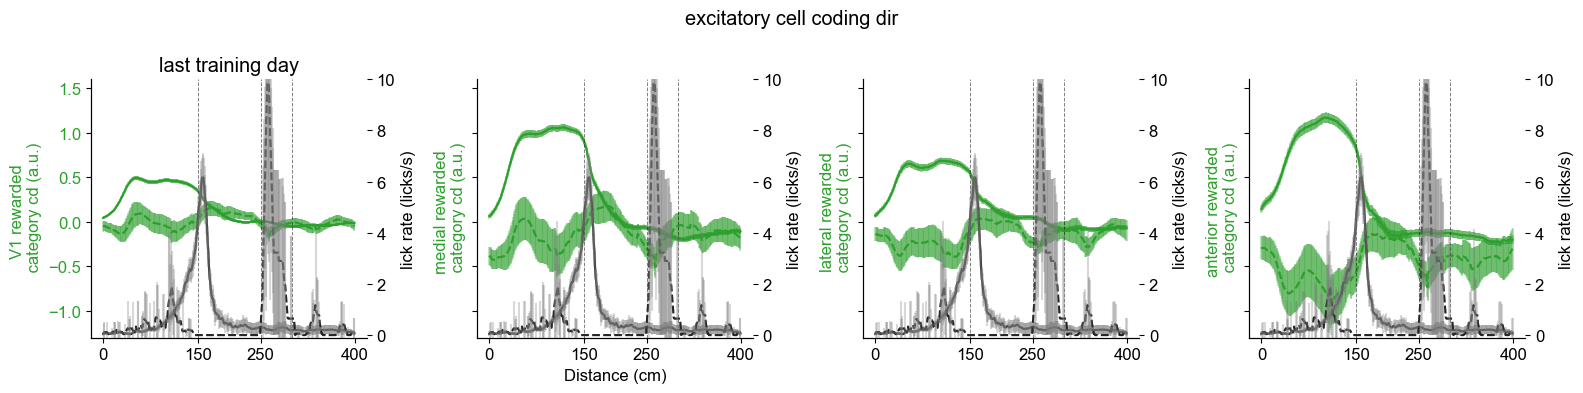

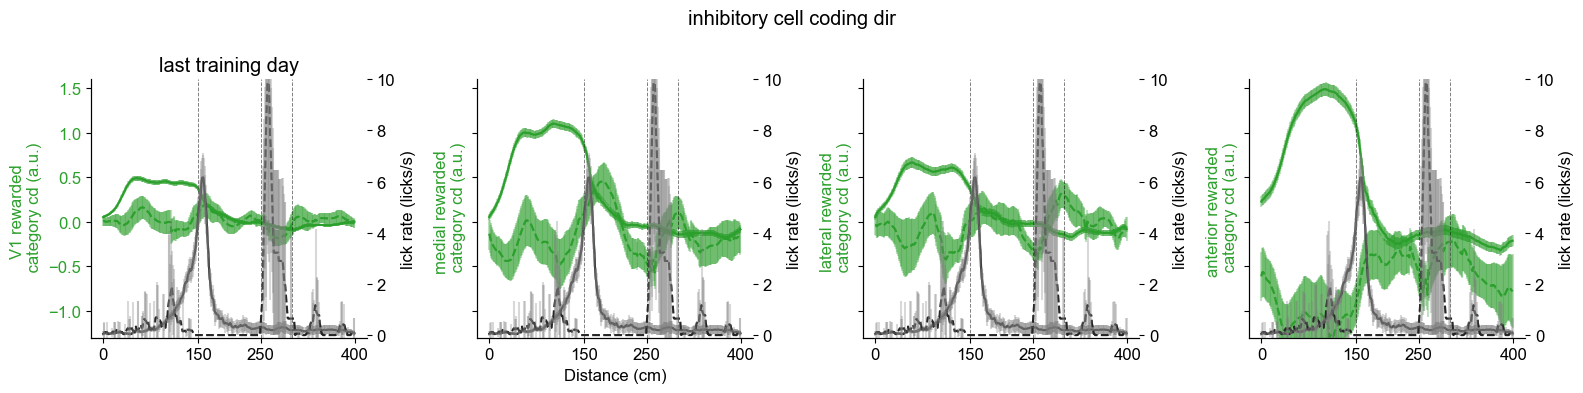

In [272]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center')
        ax[1].set_xlabel('Distance (cm)')
        ax[1].set_xticks([0, 150, 250, 400])
        for a, area in enumerate(areas):
            for lick in range(2):
                day_cds = lick_response[sess,2,a,cell_type,lick]
                day_rates = lick_rates[sess,0,lick]
                day_rates = np.vstack(day_rates)
                day_cds = np.vstack(day_cds)
                if lick == 0:
                    ax[a].plot(day_cds.mean(0), color='tab:green', label='reward colleted trials')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', alpha = 0.3)
                    ax2 = ax[a].twinx()  # instantiate a second axes that shares the same x-axis
                    ax2.set_ylim((-.1, 10))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='lick rate')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
                else:
                    ax[a].plot(day_cds.mean(0), color='tab:green', label='omitted trials', linestyle='--')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:green', linestyle='--', alpha = 0.3)
                    ax2.set_ylim((-.1, 10))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='omitted trials', linestyle='--')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray', linestyle='--')
            ax[a].tick_params(axis='y', labelcolor='tab:green')
            ax[a].set_ylim((-1.3, 1.6))
            ax[a].set_ylabel(f'{area} rewarded \n category cd (a.u.)', color='tab:green')
            ax[a].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            # draw a vertical line at 150
            #ax[3].legend(bbox_to_anchor=(1.10, 1.5), loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

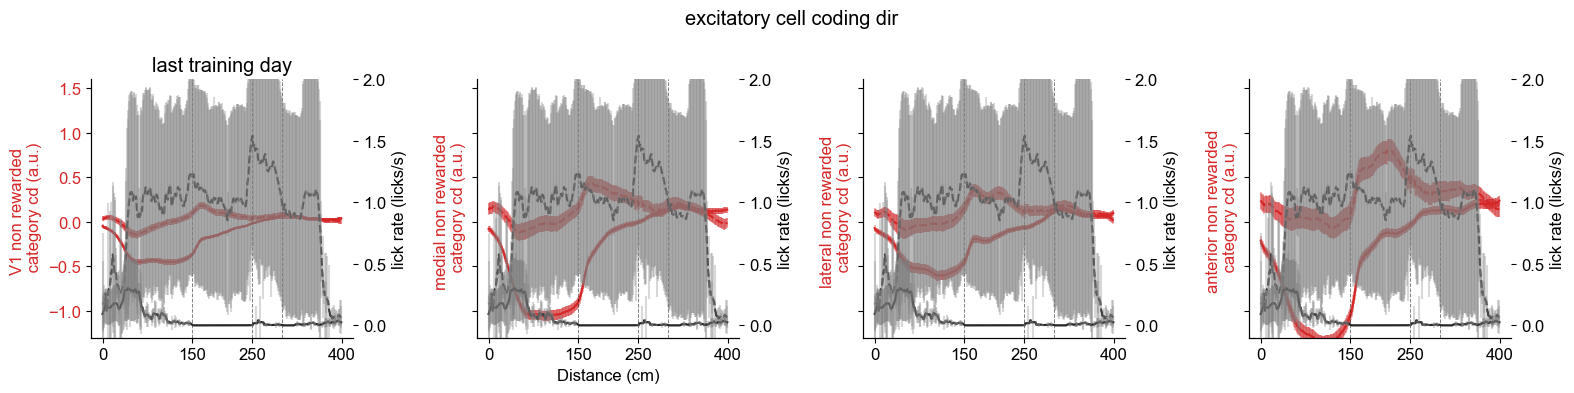

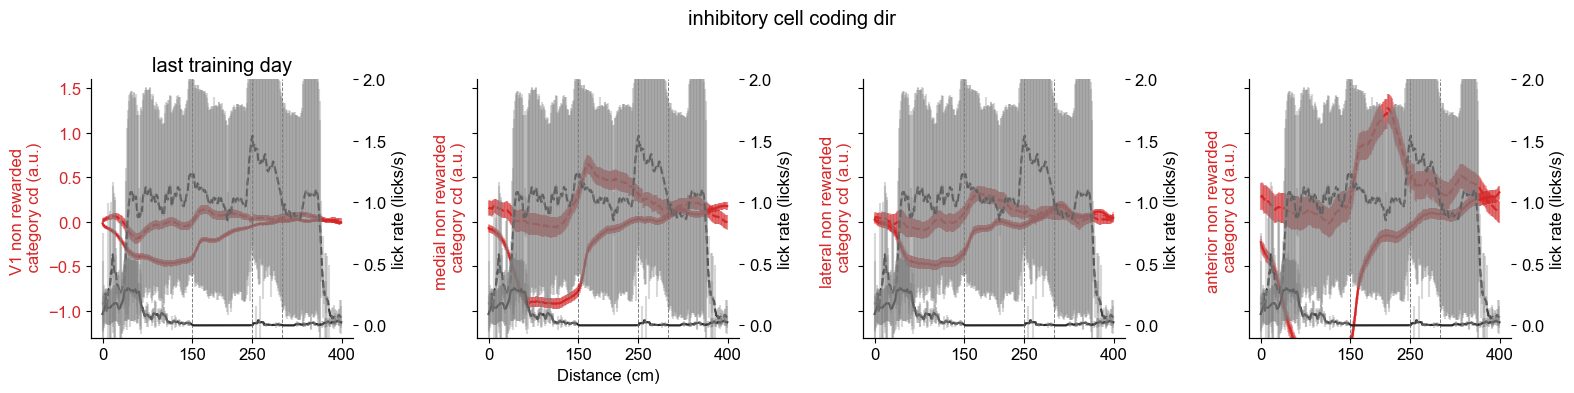

In [278]:
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sess_days = [third_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
for cell_type in range(2):
    fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)
    if cell_type == 0:
        fig.suptitle('excitatory cell coding dir', y=0.98)
    else:
        fig.suptitle('inhibitory cell coding dir', y=0.98)
    for iss, sess in enumerate(sess_days):
        ax[0].set_title(f"{day_titles[2]}", loc='center')
        ax[1].set_xlabel('Distance (cm)')
        ax[1].set_xticks([0, 150, 250, 400])
        for a, area in enumerate(areas):
            for lick in range(2):
                day_cds = lick_response[sess,3,a,cell_type,lick]
                day_rates = lick_rates[sess,1,lick]
                day_rates = np.vstack(day_rates)
                day_cds = np.vstack(day_cds)
                if lick == 0:
                    ax[a].plot(day_cds.mean(0), color='tab:red', label='false alarms', linestyle='--')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:red', linestyle='--', alpha = 0.3)
                    ax2 = ax[a].twinx()  # instantiate a second axes that shares the same x-axis
                    ax2.set_ylim((-.1, 2))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='lick rate', linestyle='--')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
                else:
                    ax[a].plot(day_cds.mean(0), color='tab:red', label='omitted trials')
                    ax[a].errorbar(np.arange(400), day_cds.mean(0), yerr=sem(day_cds), color='tab:red', alpha = 0.3, linestyle='--')
                    ax2.set_ylim((-.1, 2))
                    ax2.set_ylabel('lick rate (licks/s)')  # we already handled the x-label with ax1
                    smoothing = 10
                    lick_rate_s = np.convolve(day_rates.mean(0), np.ones(smoothing)/smoothing, mode='same')
                    ax2.plot(lick_rate_s, color='k', label='omitted trials')
                    ax2.errorbar(np.arange(400), lick_rate_s, yerr=sem(day_rates), alpha = 0.3, color='gray')
            ax[a].tick_params(axis='y', labelcolor='tab:red')
            ax[a].set_ylim((-1.3, 1.6))
            ax[a].set_ylabel(f'{area} non rewarded \n category cd (a.u.)', color='tab:red')
            ax[a].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            ax[a].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
            # draw a vertical line at 150
            #ax[3].legend(bbox_to_anchor=(1.10, 1.5), loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()